# Zadanie 6 — PINN dla PDE (porównanie z PDE i ODE)

Cel:
1) Stworzyć fizycznie informowaną sieć (PINN) aproksymującą pola S(x,y,t), R(x,y,t), I(x,y,t), C(x,y,t).
2) Trenować PINN na:
   - resztach równań PDE (fizyka),
   - warunkach początkowych i brzegowych,
   - słabych danych TB(t)=∬(S+R) dxdy z PDE (po asymilacji).
3) Porównać predykcję PINN z symulacją PDE oraz z modelem ODE (parametry z asymilacji).
Zapisy: figi → `figs/`, dane → `out/`.

In [1]:
import os, json, math, time, random, sys
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Path("figs").mkdir(exist_ok=True)
Path("out").mkdir(exist_ok=True)

def savefig_fig(name, dpi=160):
    if not str(name).startswith("figs/"):
        name = f"figs/{name}"
    plt.savefig(name, dpi=dpi, bbox_inches="tight")
    print(f"[Zapisano wykres] {name}")

def save_json(obj, path):
    if not str(path).startswith("out/"):
        path = f"out/{path}"
    with open(path, "w") as f:
        json.dump(obj, f, indent=2)
    print(f"[Zapisano JSON] {path}")

# Reproducowalność
np.random.seed(123)
random.seed(123)

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Poprawka: użyj CPU jako fallback zamiast MPS (dla większej kompatybilności)
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"[Device] Używam: {device}")

[Device] Używam: cuda


[Zapisano trajektorię] out/explicit_Nx96_Ny96_traj.csv
[Zapisano metadane] out/explicit_Nx96_Ny96_info.json
[Zapisano macierz] out/explicit_Nx96_Ny96_S_final.npy
[Zapisano macierz] out/explicit_Nx96_Ny96_R_final.npy
[Zapisano macierz] out/explicit_Nx96_Ny96_I_final.npy
[Zapisano macierz] out/explicit_Nx96_Ny96_C_final.npy


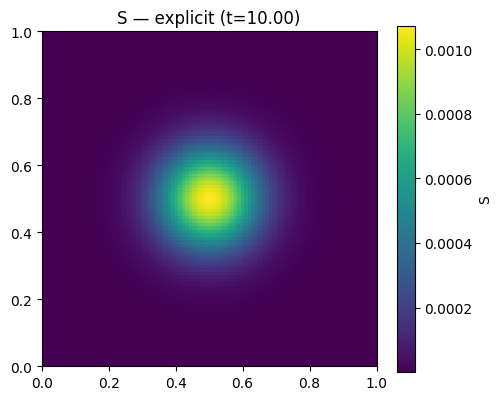

[Zapisano wykres] figs/explicit_S_final.png


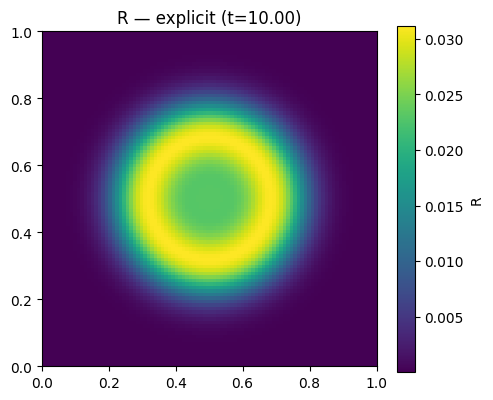

[Zapisano wykres] figs/explicit_R_final.png


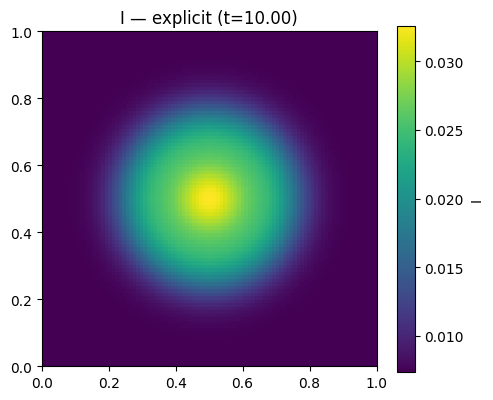

[Zapisano wykres] figs/explicit_I_final.png


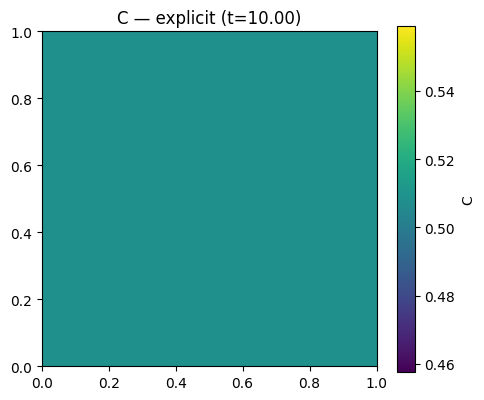

[Zapisano wykres] figs/explicit_C_final.png
[Zapisano trajektorię] out/semi_implicit_Nx96_Ny96_traj.csv
[Zapisano metadane] out/semi_implicit_Nx96_Ny96_info.json
[Zapisano macierz] out/semi_implicit_Nx96_Ny96_S_final.npy
[Zapisano macierz] out/semi_implicit_Nx96_Ny96_R_final.npy
[Zapisano macierz] out/semi_implicit_Nx96_Ny96_I_final.npy
[Zapisano macierz] out/semi_implicit_Nx96_Ny96_C_final.npy


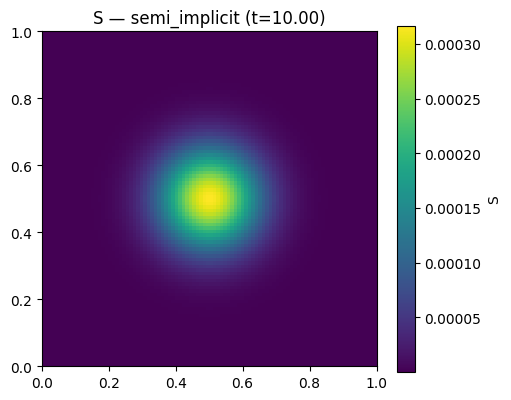

[Zapisano wykres] figs/semi_implicit_S_final.png


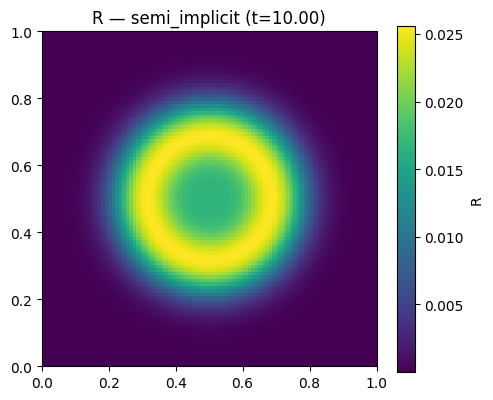

[Zapisano wykres] figs/semi_implicit_R_final.png


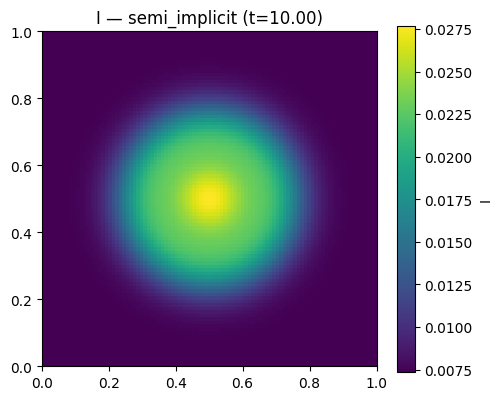

[Zapisano wykres] figs/semi_implicit_I_final.png


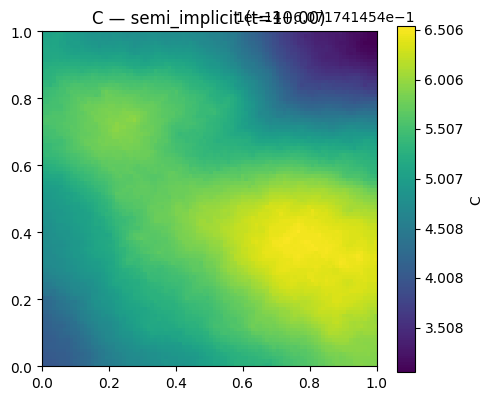

[Zapisano wykres] figs/semi_implicit_C_final.png
[Zapisano wykres] figs/compare_tb.png


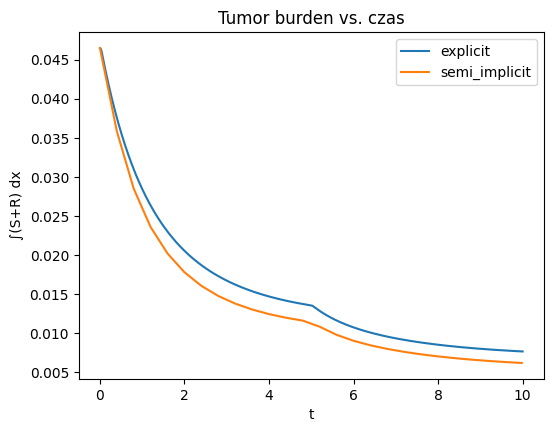

[explicit] N=64  dt=9.070e-04  time=1.51s  TB=0.01344
[semi_implicit] N=64  dt=2.000e-02  time=2.06s  TB=0.01149
[explicit] N=96  dt=3.989e-04  time=5.71s  TB=0.01357
[semi_implicit] N=96  dt=2.000e-02  time=6.89s  TB=0.01149
[explicit] N=128  dt=2.232e-04  time=15.42s  TB=0.01358
[semi_implicit] N=128  dt=2.000e-02  time=13.11s  TB=0.01149
[Zapisano] out/benchmark_resolutions.csv
[Zapisano wykres] figs/benchmark_time_vs_N.png


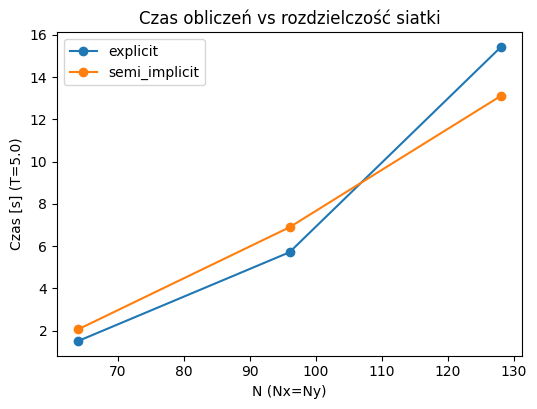

[explicit] dt=1.008e-03 steps=4962 time=1.27s
[explicit] dt=6.719e-04 steps=7442 time=1.93s
[explicit] dt=5.039e-04 steps=9923 time=2.51s
[explicit] dt=3.359e-04 steps=14884 time=3.89s
[Zapisano wykres] figs/stability_vs_dt_explicit.png


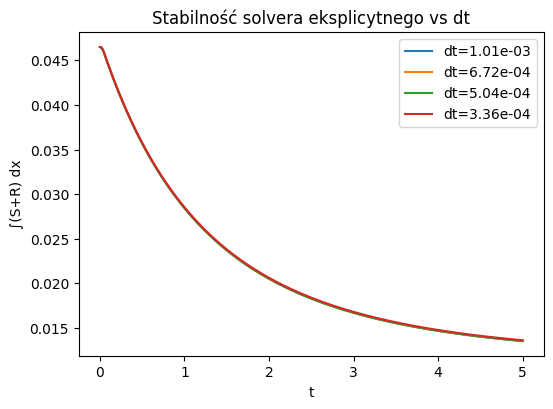

D_C=0.005 -> TB_final=0.01149 (solver=semi_implicit, dt=2.000e-02)
D_C=0.01 -> TB_final=0.01149 (solver=semi_implicit, dt=2.000e-02)
D_C=0.02 -> TB_final=0.01149 (solver=semi_implicit, dt=2.000e-02)
D_C=0.03 -> TB_final=0.01149 (solver=semi_implicit, dt=2.000e-02)
alpha_S=0.4 -> TB_final=0.01855 (solver=semi_implicit, dt=2.000e-02)
alpha_S=0.8 -> TB_final=0.01149 (solver=semi_implicit, dt=2.000e-02)
alpha_S=1 -> TB_final=0.01027 (solver=semi_implicit, dt=2.000e-02)
alpha_S=1.2 -> TB_final=0.00962 (solver=semi_implicit, dt=2.000e-02)
mu_max=0 -> TB_final=0.01016 (solver=semi_implicit, dt=2.000e-02)
mu_max=0.02 -> TB_final=0.01071 (solver=semi_implicit, dt=2.000e-02)
mu_max=0.05 -> TB_final=0.01149 (solver=semi_implicit, dt=2.000e-02)
mu_max=0.1 -> TB_final=0.01268 (solver=semi_implicit, dt=2.000e-02)
[Zapisano] out/param_sweep_basic.csv
[Zapisano wykres] figs/param_Dc_tb.png


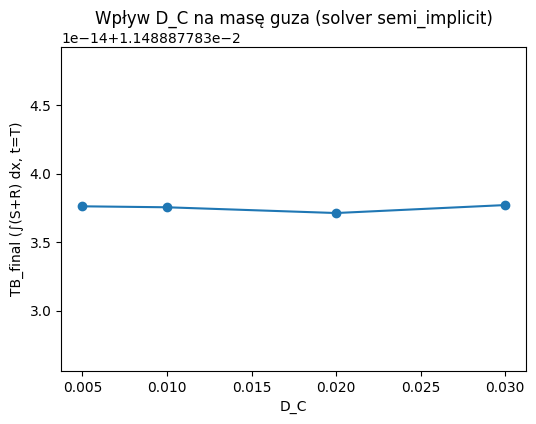

[Zapisano wykres] figs/param_alphaS_tb.png


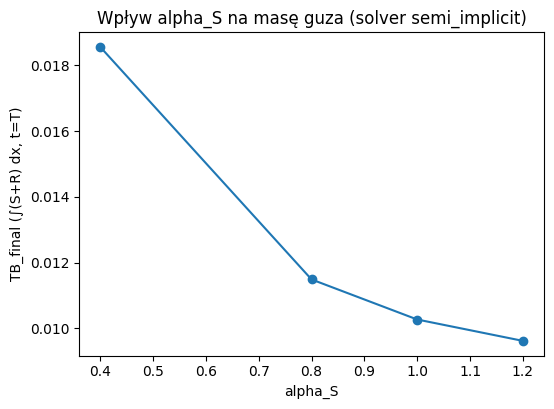

[Zapisano wykres] figs/param_mu_tb.png


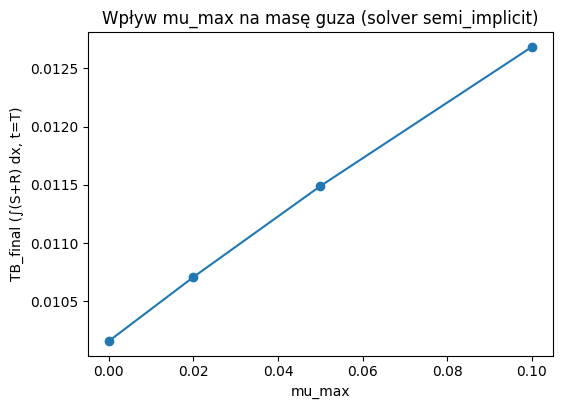

[Zapisano trajektorię] out/compare_explicit_N96_traj.csv
[Zapisano metadane] out/compare_explicit_N96_info.json
[Zapisano macierz] out/compare_explicit_N96_S_final.npy
[Zapisano macierz] out/compare_explicit_N96_R_final.npy
[Zapisano macierz] out/compare_explicit_N96_I_final.npy
[Zapisano macierz] out/compare_explicit_N96_C_final.npy
[Tworzenie GIF dla explicit...]
  Liczba klatek: 39, dt=0.000399, save_every=400
[Zapisano animację] figs/compare_explicit_animation.gif
[Zapisano wykres] figs/compare_explicit_all_fields_final.png


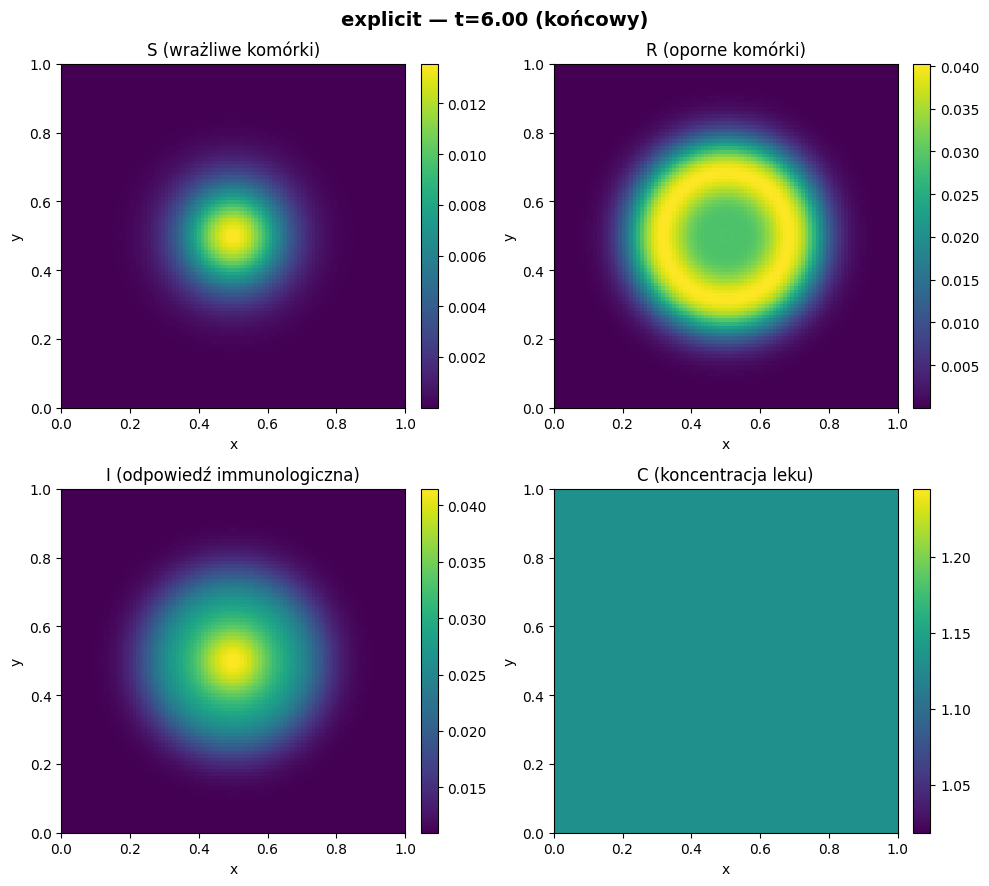

[Zapisano trajektorię] out/compare_semi_implicit_N96_traj.csv
[Zapisano metadane] out/compare_semi_implicit_N96_info.json
[Zapisano macierz] out/compare_semi_implicit_N96_S_final.npy
[Zapisano macierz] out/compare_semi_implicit_N96_R_final.npy
[Zapisano macierz] out/compare_semi_implicit_N96_I_final.npy
[Zapisano macierz] out/compare_semi_implicit_N96_C_final.npy
[Tworzenie GIF dla semi_implicit...]
  Liczba klatek: 16, dt=0.020000, save_every=20
[Zapisano animację] figs/compare_semi_implicit_animation.gif
[Zapisano wykres] figs/compare_semi_implicit_all_fields_final.png


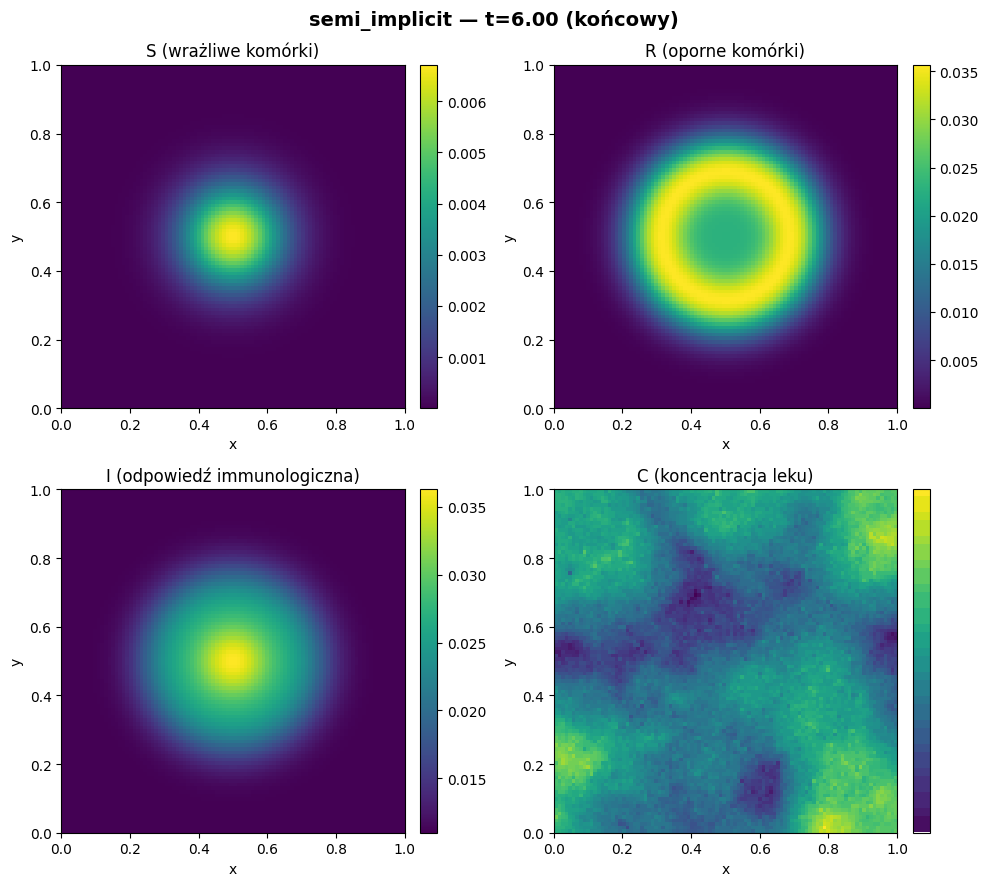

[Zapisano wykres] figs/compare_solvers_tb.png


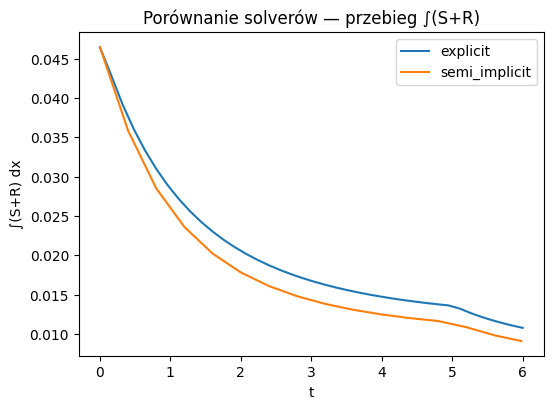

Relatywna różnica krzywych TB (norma 2): 1.220e-14
[Zapisano] out/compare_solvers_same_dt.csv
[Zapisano wykres] figs/compare_solvers_same_dt.png


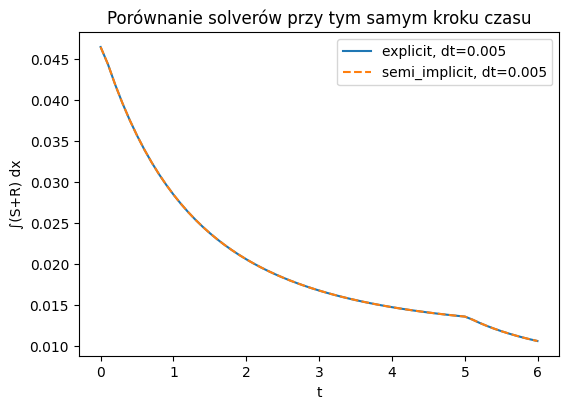

[Zapisano wykres] figs/compare_solvers_same_dt_diff.png


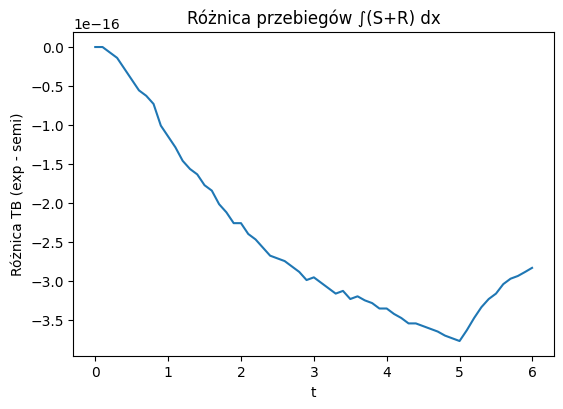

D_C=0.005 -> TB_final=0.02611
D_C=0.01 -> TB_final=0.02625
D_C=0.02 -> TB_final=0.02656
D_C=0.03 -> TB_final=0.02680
D_C=0.05 -> TB_final=0.02711
[Zapisano] out/robin_beta_sweep_Dc.csv
[Zapisano wykres] figs/robin_beta_Dc_influence.png


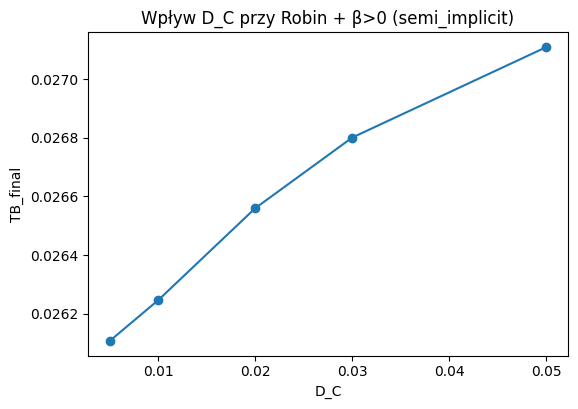

alpha_S=0.4 [LO] -> TB_final=0.01401, time=2.36s
alpha_S=1.2 [HI] -> TB_final=0.00809, time=2.39s
mu_max=0.0 [LO] -> TB_final=0.00768, time=2.37s
mu_max=0.1 [HI] -> TB_final=0.01031, time=2.39s
lam=0.05 [LO] -> TB_final=0.00663, time=2.37s
lam=0.5 [HI] -> TB_final=0.01391, time=2.35s
sigma=0.0 [LO] -> TB_final=0.00910, time=2.39s
sigma=0.1 [HI] -> TB_final=0.00908, time=2.44s
[Zapisano] out/extremes_summary.csv
[Zapisano wykres] figs/extremes_tb_bar.png


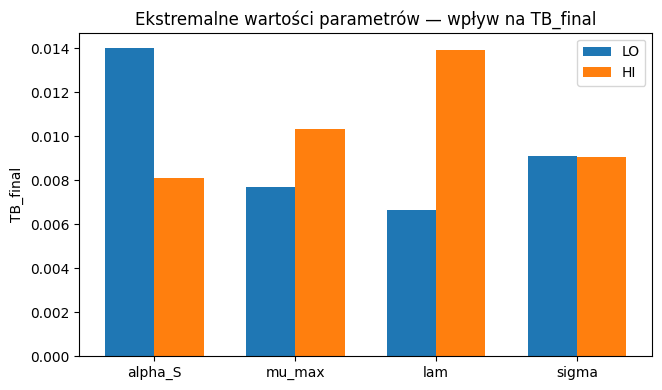

[Zapisano wykres] figs/panel_maps_explicit.png
[Zapisano wykres] figs/panel_maps_semi_implicit.png
[Zapisano wykres] figs/panel_tb_compare.png


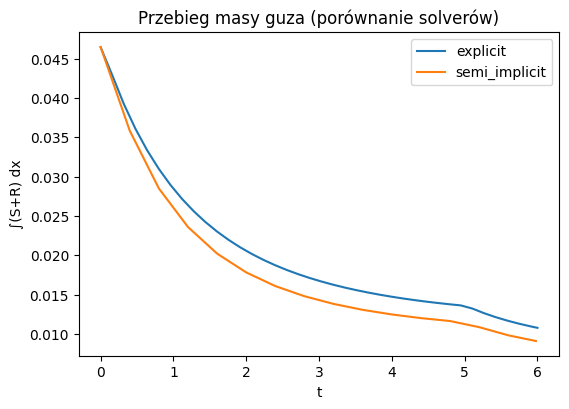

[OK] Moduł PDE załadowany.
[PARAMS] Źródło: out/3dvar_large_summary.json  →  alpha_S=1.200, mu_max=0.005, lam=0.065


In [2]:
# 1) Próba importu Twojego modułu PDE (Zadanie 2)
import importlib.util

PDE_OK = True
try:
    candidates = ["2_tumor_diffusion_pde_analysis.py"]
    pdemod = None
    for cand in candidates:
        if Path(cand).exists():
            spec = importlib.util.spec_from_file_location("pdemod", cand)
            pdemod = importlib.util.module_from_spec(spec)
            sys.modules["pdemod"] = pdemod
            spec.loader.exec_module(pdemod)
            break
    if pdemod is None:
        raise FileNotFoundError("Nie znaleziono pliku modułu PDE.")
    Grid = pdemod.Grid
    Params = pdemod.Params
    run_simulation = pdemod.run_simulation
    init_fields = pdemod.init_fields
    p_base = pdemod.p
    print("[OK] Moduł PDE załadowany.")
except Exception as e:
    PDE_OK = False
    print("Uwaga: nie udało się załadować modułu PDE:", e)

# 2) ODE (z Zad. 5) — tylko do porównań TB(t)
from dataclasses import dataclass

@dataclass
class ODEParams:
    rho_S: float = 0.04
    rho_R: float = 0.03
    K: float = 1.0
    alpha_S: float = 0.8
    alpha_R: float = 0.12
    sigma: float = 0.05
    delta: float = 0.1
    gamma_S: float = 0.02
    gamma_R: float = 0.02
    lam: float = 0.2
    beta: float = 0.0
    mu_max: float = 0.05
    C50: float = 0.2
    m_hill: int = 3
    dose_type: str = "bolus_periodic"
    dose_A: float = 1.0
    dose_period: float = 5.0
    infusion_rate: float = 0.0

def mu_of_C(C, mu_max, C50, m):
    Cn = max(C, 0.0)
    r = (Cn/(C50+1e-12))**m
    return mu_max * (r/(1+r))

def dosing_term_exact(t, dt, period, A):
    tau = 0.01*period
    t0 = (t // period) * period
    start, end = t0, t0+tau
    overlap = max(0.0, min(t+dt, end)-max(t, start))
    return (A/tau)*(overlap/max(dt,1e-12))

def ode_rhs(t, y, p: ODEParams, dt_for_dose):
    S, R, I, C = y
    N = S + R
    dS = p.rho_S*S*(1-N/p.K) - p.alpha_S*C*S - p.gamma_S*I*S
    dR = p.rho_R*R*(1-N/p.K) - p.alpha_R*C*R - p.gamma_R*I*R
    dS -= mu_of_C(C, p.mu_max, p.C50, p.m_hill) * S
    dR += mu_of_C(C, p.mu_max, p.C50, p.m_hill) * S
    dI = p.sigma*N - p.delta*I
    dC = -p.lam*C - p.beta*C*N
    I_in = dosing_term_exact(t, dt_for_dose, p.dose_period, p.dose_A) if p.dose_type=="bolus_periodic" else 0.0
    dC += I_in
    return np.array([dS,dR,dI,dC], dtype=float)

from scipy.integrate import solve_ivp
def simulate_ode(p: ODEParams, y0, t_eval):
    dt = np.mean(np.diff(t_eval)) if len(t_eval)>1 else 1e-2
    fun = lambda t,y: ode_rhs(t,y,p,dt)
    sol = solve_ivp(fun, (t_eval[0], t_eval[-1]), y0, t_eval=t_eval, rtol=1e-7, atol=1e-9)
    Y = sol.y.T
    return {"t": t_eval, "S": Y[:,0], "R": Y[:,1], "I": Y[:,2], "C": Y[:,3], "TB": Y[:,0]+Y[:,1]}

# 3) Wczytaj parametry po asymilacji (preferencyjnie 3D-Var large → medium → small; fallback: ABC)
def load_assimilated_params():
    order = ["out/3dvar_large_summary.json", "out/3dvar_medium_summary.json", "out/3dvar_small_summary.json",
             "out/abc_large_summary.json", "out/abc_medium_summary.json", "out/abc_small_summary.json"]
    for path in order:
        if Path(path).exists():
            with open(path, "r") as f:
                js = json.load(f)
            if "theta_opt" in js:
                alpha_S, mu_max, lam = js["theta_opt"]
            else:
                alpha_S, mu_max, lam = js["theta_map"]
            return float(alpha_S), float(mu_max), float(lam), path
    # fallback — bazowe
    return p_base.alpha_S, p_base.mu_max, p_base.lam, "baseline(p_base)"

alpha_S_assim, mu_max_assim, lam_assim, src = load_assimilated_params()
print(f"[PARAMS] Źródło: {src}  →  alpha_S={alpha_S_assim:.3f}, mu_max={mu_max_assim:.3f}, lam={lam_assim:.3f}")

In [3]:
# Horyzont i siatki
T_end = 6.0
Lx, Ly = 1.0, 1.0  # Domena przestrzenna
t_eval = np.linspace(0.0, T_end, 121)  # co 0.05
Nx_data, Ny_data = 64, 64              # siatka do generacji danych i ewaluacji

if not PDE_OK:
    raise RuntimeError("Moduł PDE wymagany do Zadania 6 (PINN).")

# Ustaw parametry PDE po asymilacji
p_assim = Params(**vars(p_base))
p_assim.alpha_S = alpha_S_assim
p_assim.mu_max  = mu_max_assim
p_assim.lam     = lam_assim

# Symulacja PDE (semi-implicit) → TB(t) oraz stany końcowe do wizualizacji
grid = Grid(Nx=Nx_data, Ny=Ny_data, Lx=Lx, Ly=Ly)
(S_end, R_end, I_end, C_end), traj, info = run_simulation(
    solver_name="semi_implicit",
    grid=grid, p=p_assim,
    T=T_end, dt=None, save_every=max(1, len(t_eval)//120), theta=0.5
)

# Referencja TB(t) z traj
t_traj = np.array([row["t"] for row in traj])
TB_traj = np.array([row["tumor_burden"] for row in traj])
TB_pde = np.interp(t_eval, t_traj, TB_traj)

# --- Inicjalizacja pól początkowych (IC) dla strat IC PINN ---
# POPRAWKA: Użyj funkcji init_fields z modułu PDE dla spójności
S0_mat, R0_mat, I0_mat, C0_mat = init_fields(grid)
print(f"[IC] Użyto init_fields() z modułu PDE. S0: [{S0_mat.min():.4e}, {S0_mat.max():.4e}], C0: [{C0_mat.min():.4e}, {C0_mat.max():.4e}]")

# Losowania punktów treningowych
n_phys   = 8000   # zwiększone dla lepszej kolokacji
n_ic     = 2000
n_bc     = 2000
n_tb     = 150    # zmniejszone - TB jest globalne, nie potrzebujemy zbyt wielu punktów

xs = np.linspace(0,Lx,Nx_data); ys = np.linspace(0,Ly,Ny_data)

def sample_uniform_xy(n):
    return np.random.rand(n,1)*Lx, np.random.rand(n,1)*Ly

# Kolokacja (t,x,y)
t_phys = np.random.rand(n_phys,1) * T_end
x_phys, y_phys = sample_uniform_xy(n_phys)

# IC: t=0 z etykietą z macierzy IC
ix_ic = np.random.randint(0, Nx_data, size=n_ic)
iy_ic = np.random.randint(0, Ny_data, size=n_ic)
t_ic  = np.zeros((n_ic,1))
x_ic  = xs[ix_ic][:,None]
y_ic  = ys[iy_ic][:,None]
S_ic  = S0_mat[ix_ic, iy_ic][:,None]
R_ic  = R0_mat[ix_ic, iy_ic][:,None]
I_ic  = I0_mat[ix_ic, iy_ic][:,None]
C_ic  = C0_mat[ix_ic, iy_ic][:,None]

# BC: próbki na brzegu
def sample_boundary(n):
    sel = np.random.randint(0,4,size=n)
    t = np.random.rand(n,1)*T_end
    x = np.random.rand(n,1)*Lx
    y = np.random.rand(n,1)*Ly
    nx = np.zeros((n,1)); ny = np.zeros((n,1))
    for i,s in enumerate(sel):
        if s==0:   x[i]=0.0; nx[i]=-1.0; ny[i]=0.0
        elif s==1: x[i]=Lx;  nx[i]= 1.0; ny[i]=0.0
        elif s==2: y[i]=0.0; nx[i]= 0.0; ny[i]=-1.0
        else:      y[i]=Ly;  nx[i]= 0.0; ny[i]= 1.0
    return t,x,y,nx,ny

t_bc, x_bc, y_bc, nx_bc, ny_bc = sample_boundary(n_bc)

# TB: losowe czasy i TB_pde(t) jako „dane" dla straty TB
it_tb = np.random.randint(0, len(t_eval), size=n_tb)
t_tb  = t_eval[it_tb][:,None]
TB_tb = TB_pde[it_tb][:,None]

# Zapis referencji TB
pd.DataFrame({"t": t_eval, "TB_pde": TB_pde}).to_csv("out/pinn_tb_reference.csv", index=False)
print("[Zapisano] out/pinn_tb_reference.csv")

[IC] Użyto init_fields() z modułu PDE. S0: [1.1168e-10, 4.9721e-01], C0: [0.0000e+00, 0.0000e+00]
[Zapisano] out/pinn_tb_reference.csv


In [4]:
# === Normalizacja wejść (POPRAWKA: tworzymy jako funkcję z ustalonymi parametrami) ===
class InputNormalizer:
    def __init__(self, T_max, Lx, Ly):
        self.T_max = T_max
        self.Lx = Lx
        self.Ly = Ly

    def normalize(self, t, x, y):
        """Mapuje t∈[0,T] → [0,1], x∈[0,Lx] → [-1,1], y∈[0,Ly] → [-1,1]"""
        tn = t / self.T_max
        xn = 2.0 * (x / self.Lx) - 1.0
        yn = 2.0 * (y / self.Ly) - 1.0
        return tn, xn, yn

normalizer = InputNormalizer(T_end, Lx, Ly)

# Zgrubne skale wyjść zgodne z rzędem wielkości z Twoich symulacji PDE
# POPRAWKA: dostosowane do rzeczywistych zakresów z IC
OUT_SCALE = {
    "S": max(float(S0_mat.max()), 1e-4),
    "R": max(float(R0_mat.max()), 1e-4),
    "I": max(float(I0_mat.max()), 1e-3),
    "C": 1.0  # koncentracja leku
}
print(f"[Skale wyjść] S: {OUT_SCALE['S']:.4e}, R: {OUT_SCALE['R']:.4e}, I: {OUT_SCALE['I']:.4e}, C: {OUT_SCALE['C']:.4e}")

[Skale wyjść] S: 4.9721e-01, R: 5.0000e-02, I: 2.0000e-02, C: 1.0000e+00


In [5]:
class MLP(nn.Module):
    def __init__(self, in_dim=3, out_dim=4, width=128, depth=6):
        super().__init__()
        layers = []
        layers.append(nn.Linear(in_dim, width))
        layers.append(nn.Tanh())
        for _ in range(depth-1):
            layers.append(nn.Linear(width, width))
            layers.append(nn.Tanh())
        layers.append(nn.Linear(width, out_dim))  # [S,R,I,C]
        self.net = nn.Sequential(*layers)
        self.softplus = torch.nn.Softplus(beta=1.0)

    def forward(self, t, x, y):
        """POPRAWKA: Przyjmuje oddzielne tensory t,x,y i normalizuje je wewnętrznie"""
        # Normalizacja wejść
        tn, xn, yn = normalizer.normalize(t, x, y)
        inp = torch.cat([tn, xn, yn], dim=1)

        raw = self.net(inp)  # shape [N, 4] -> [S_raw, R_raw, I_raw, C_raw]

        # Softplus + skalowanie, żeby wymusić nieujemność i poprawne rzędy wielkości
        S = self.softplus(raw[:, 0:1]) * OUT_SCALE["S"]
        R = self.softplus(raw[:, 1:2]) * OUT_SCALE["R"]
        I = self.softplus(raw[:, 2:3]) * OUT_SCALE["I"]
        C = self.softplus(raw[:, 3:4]) * OUT_SCALE["C"]

        return S, R, I, C

pinn = MLP().to(device)
print(f"[Model] Parametry: {sum(p.numel() for p in pinn.parameters())/1e6:.3f}M")

[Model] Parametry: 0.084M


In [6]:
# Parametry fizyczne → tensory
D_S = torch.tensor(float(p_assim.D_S), device=device)
D_R = torch.tensor(float(p_assim.D_R), device=device)
D_I = torch.tensor(float(p_assim.D_I), device=device)
D_C = torch.tensor(float(p_assim.D_C), device=device)

rho_S   = torch.tensor(float(p_assim.rho_S), device=device)
rho_R   = torch.tensor(float(p_assim.rho_R), device=device)
Kcap    = torch.tensor(float(p_assim.K), device=device)
alpha_S = torch.tensor(float(p_assim.alpha_S), device=device)
alpha_R = torch.tensor(float(p_assim.alpha_R), device=device)
sigma   = torch.tensor(float(p_assim.sigma), device=device)
delta   = torch.tensor(float(p_assim.delta), device=device)
gamma_S = torch.tensor(float(p_assim.gamma_S), device=device)
gamma_R = torch.tensor(float(p_assim.gamma_R), device=device)
lam     = torch.tensor(float(p_assim.lam), device=device)
beta    = torch.tensor(float(p_assim.beta), device=device)
mu_max  = torch.tensor(float(p_assim.mu_max), device=device)
C50     = torch.tensor(float(p_assim.C50), device=device)
m_hill  = int(p_assim.m_hill)

def mu_hill(C):
    Cpos = torch.clamp(C, min=0.0)
    r = (Cpos/(C50+1e-12))**m_hill
    return mu_max * (r/(1.0 + r))

def laplacian(u, x, y):
    grads = torch.autograd.grad(u, (x,y), grad_outputs=torch.ones_like(u), create_graph=True)
    ux, uy = grads[0], grads[1]
    uxx = torch.autograd.grad(ux, x, grad_outputs=torch.ones_like(ux), create_graph=True)[0]
    uyy = torch.autograd.grad(uy, y, grad_outputs=torch.ones_like(uy), create_graph=True)[0]
    return uxx + uyy, ux, uy

def pde_residuals(t, x, y):
    """POPRAWKA: Używa nowej sygnatury forward() z oddzielnymi argumentami"""
    t.requires_grad_(True); x.requires_grad_(True); y.requires_grad_(True)
    S, R, I, C = pinn(t, x, y)
    N = S + R

    dSdt = torch.autograd.grad(S, t, grad_outputs=torch.ones_like(S), create_graph=True)[0]
    dRdt = torch.autograd.grad(R, t, grad_outputs=torch.ones_like(R), create_graph=True)[0]
    dIdt = torch.autograd.grad(I, t, grad_outputs=torch.ones_like(I), create_graph=True)[0]
    dCdt = torch.autograd.grad(C, t, grad_outputs=torch.ones_like(C), create_graph=True)[0]

    lapS, _, _ = laplacian(S, x, y)
    lapR, _, _ = laplacian(R, x, y)
    lapI, _, _ = laplacian(I, x, y)
    lapC, _, _ = laplacian(C, x, y)

    mu = mu_hill(C)

    # Równania PDE (bez źródła dawkowania - to jest wchłonięte przez dane TB)
    fS = dSdt - (D_S*lapS + rho_S*S*(1.0 - N/Kcap) - alpha_S*C*S - gamma_S*I*S - mu*S)
    fR = dRdt - (D_R*lapR + rho_R*R*(1.0 - N/Kcap) - alpha_R*C*R - gamma_R*I*R + mu*S)
    fI = dIdt - (D_I*lapI + sigma*N - delta*I)
    fC = dCdt - (D_C*lapC - lam*C - beta*C*N)

    return fS, fR, fI, fC, S, R, I, C

# Tensory danych
to_t = lambda a: torch.tensor(a, dtype=torch.float32, device=device)
t_phys_t = to_t(t_phys); x_phys_t = to_t(x_phys); y_phys_t = to_t(y_phys)

t_ic_t = to_t(t_ic); x_ic_t = to_t(x_ic); y_ic_t = to_t(y_ic)
S_ic_t = to_t(S_ic); R_ic_t = to_t(R_ic); I_ic_t = to_t(I_ic); C_ic_t = to_t(C_ic)

t_bc_t = to_t(t_bc); x_bc_t = to_t(x_bc); y_bc_t = to_t(y_bc)
nx_bc_t = to_t(nx_bc); ny_bc_t = to_t(ny_bc)

t_tb_t  = to_t(t_tb)              # [n_tb,1]
TB_tb_t = to_t(TB_tb)             # [n_tb,1]

In [7]:
# === POPRAWKA KRYTYCZNA: TB(t) z gradientami ===
def pinn_TB_batch(t_vec_1d: torch.Tensor) -> torch.Tensor:
    """
    POPRAWKA: Usuwa no_grad() i używa prawidłowej kwadratury
    t_vec_1d: tensor [M, 1] (na device), zwraca TB dla każdego t (tensor [M,1]).
    """
    M = t_vec_1d.shape[0]
    # Siatka kwadratury (zmniejszona dla szybkości, ale zachowująca gradients)
    qN = 32
    x = torch.linspace(0.0, Lx, qN, device=device)
    y = torch.linspace(0.0, Ly, qN, device=device)
    X, Y = torch.meshgrid(x, y, indexing='ij')
    Xf = X.reshape(-1, 1); Yf = Y.reshape(-1, 1)
    dx = Lx / (qN - 1)
    dy = Ly / (qN - 1)
    dA = dx * dy  # Element powierzchni

    TB_list = []
    for i in range(M):
        t_col = t_vec_1d[i:i+1].expand(qN * qN, 1)  # [qN^2, 1]
        S, R, I, C = pinn(t_col, Xf, Yf)
        TB_integral = (S + R).sum() * dA  # Prawidłowa kwadratura prostokątów
        TB_list.append(TB_integral)

    return torch.stack(TB_list).unsqueeze(1)  # [M,1]

In [9]:
# Wagi strat (dostrojone)
w_phys = 1.0
w_ic   = 10.0   # zwiększone - IC jest kluczowy
w_bc   = 1.0
w_tb   = 100.0  # mocno zwiększone - TB jest głównym sygnałem danych

optimizer = optim.Adam(pinn.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=200)

def bc_penalty(t, x, y, nx, ny):
    """Warunki brzegowe Neumanna (zero-flux)"""
    t.requires_grad_(True); x.requires_grad_(True); y.requires_grad_(True)
    S, R, I, C = pinn(t, x, y)

    _, Sx, Sy = laplacian(S, x, y)
    _, Rx, Ry = laplacian(R, x, y)
    _, Ix, Iy = laplacian(I, x, y)
    _, Cx, Cy = laplacian(C, x, y)

    dnS = Sx*nx + Sy*ny
    dnR = Rx*nx + Ry*ny
    dnI = Ix*nx + Iy*ny
    dnC = Cx*nx + Cy*ny

    return (dnS**2).mean() + (dnR**2).mean() + (dnI**2).mean() + (dnC**2).mean()

def ic_penalty():
    """Warunki początkowe"""
    S, R, I, C = pinn(t_ic_t, x_ic_t, y_ic_t)
    return ((S-S_ic_t)**2).mean() + ((R-R_ic_t)**2).mean() + ((I-I_ic_t)**2).mean() + ((C-C_ic_t)**2).mean()

def tb_penalty():
    """POPRAWKA: Teraz z gradientami!"""
    TB_pred = pinn_TB_batch(t_tb_t)  # [n_tb,1]
    return ((TB_pred - TB_tb_t)**2).mean()

[Trening] Rozpoczynam...
  Kolokacja PDE: 8000 punktów
  IC: 2000 punktów
  BC: 2000 punktów
  TB: 150 punktów czasowych


/root/cytotoxic-drug-rd-model/.venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:1343: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  current = float(metrics)


[    1] L=2.053e+01  phys=7.514e-02  ic=5.684e-01  bc=9.109e-05  tb=1.478e-01  time=0.8s
[  100] L=9.983e-02  phys=2.247e-06  ic=9.416e-03  bc=2.095e-09  tb=5.667e-05  time=33.1s
[  200] L=9.859e-02  phys=2.061e-06  ic=9.268e-03  bc=1.667e-09  tb=5.910e-05  time=64.4s
[  300] L=9.780e-02  phys=2.009e-06  ic=9.171e-03  bc=1.413e-09  tb=6.086e-05  time=96.7s
[  400] L=9.744e-02  phys=2.005e-06  ic=9.133e-03  bc=1.306e-09  tb=6.117e-05  time=135.7s
[  500] L=9.726e-02  phys=2.008e-06  ic=9.115e-03  bc=1.294e-09  tb=6.115e-05  time=186.4s
[  600] L=9.715e-02  phys=2.011e-06  ic=9.104e-03  bc=1.377e-09  tb=6.108e-05  time=220.6s
[  700] L=9.707e-02  phys=2.015e-06  ic=9.097e-03  bc=1.598e-09  tb=6.100e-05  time=252.9s
[  800] L=9.701e-02  phys=2.021e-06  ic=9.091e-03  bc=2.073e-09  tb=6.091e-05  time=285.3s
[  900] L=9.695e-02  phys=2.029e-06  ic=9.087e-03  bc=3.138e-09  tb=6.078e-05  time=317.2s
[ 1000] L=9.688e-02  phys=2.045e-06  ic=9.082e-03  bc=6.007e-09  tb=6.057e-05  time=348.5s
[ 11

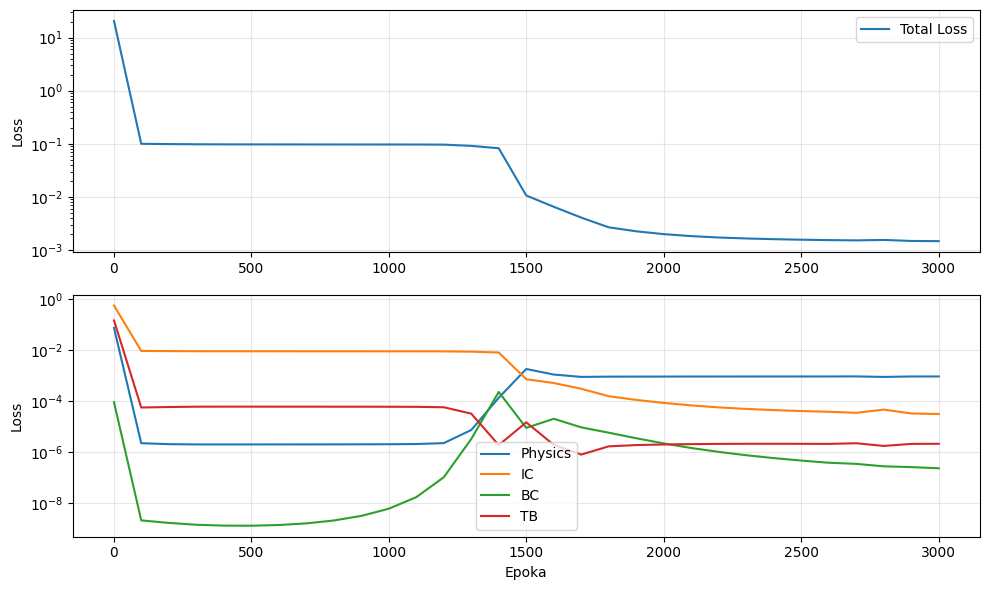

In [10]:
# Trening
history = []
epochs = 3000
t0 = time.time()

print("[Trening] Rozpoczynam...")
print(f"  Kolokacja PDE: {n_phys} punktów")
print(f"  IC: {n_ic} punktów")
print(f"  BC: {n_bc} punktów")
print(f"  TB: {n_tb} punktów czasowych")

for ep in range(1, epochs+1):
    pinn.train()
    optimizer.zero_grad()

    # Straty składowe
    fS, fR, fI, fC, _,_,_,_ = pde_residuals(t_phys_t, x_phys_t, y_phys_t)
    L_phys = (fS**2).mean() + (fR**2).mean() + (fI**2).mean() + (fC**2).mean()
    L_ic   = ic_penalty()
    L_bc   = bc_penalty(t_bc_t, x_bc_t, y_bc_t, nx_bc_t, ny_bc_t)
    L_tb   = tb_penalty()

    # Łączna strata
    loss = w_phys*L_phys + w_ic*L_ic + w_bc*L_bc + w_tb*L_tb

    loss.backward()
    optimizer.step()
    scheduler.step(loss)

    if ep % 100 == 0 or ep == 1:
        elapsed = time.time()-t0
        history.append({
            "ep":ep,
            "L":float(loss.item()),
            "L_phys":float(L_phys.item()),
            "L_ic":float(L_ic.item()),
            "L_bc":float(L_bc.item()),
            "L_tb":float(L_tb.item()),
            "time":elapsed
        })
        print(f"[{ep:5d}] L={loss.item():.3e}  phys={L_phys.item():.3e}  ic={L_ic.item():.3e}  bc={L_bc.item():.3e}  tb={L_tb.item():.3e}  time={elapsed:.1f}s")

print(f"[Trening] Zakończono w {time.time()-t0:.1f}s")

pd.DataFrame(history).to_csv("out/pinn_training_history.csv", index=False)
torch.save(pinn.state_dict(), "out/pinn_model.pt")
print("[Zapisano] out/pinn_training_history.csv")
print("[Zapisano] out/pinn_model.pt")

# Wykres historii treningu
plt.figure(figsize=(10,6))
df_hist = pd.DataFrame(history)
plt.subplot(2,1,1)
plt.plot(df_hist["ep"], df_hist["L"], label="Total Loss")
plt.yscale('log')
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2,1,2)
plt.plot(df_hist["ep"], df_hist["L_phys"], label="Physics")
plt.plot(df_hist["ep"], df_hist["L_ic"], label="IC")
plt.plot(df_hist["ep"], df_hist["L_bc"], label="BC")
plt.plot(df_hist["ep"], df_hist["L_tb"], label="TB")
plt.yscale('log')
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
savefig_fig("figs/pinn_training_loss.png")
plt.show()

[Ewaluacja] Obliczam TB(t) z PINN...
[Ewaluacja] Obliczam TB(t) z ODE...
[Zapisano JSON] out/pinn_metrics.json
[Zapisano wykres] figs/pinn_tb_compare.png


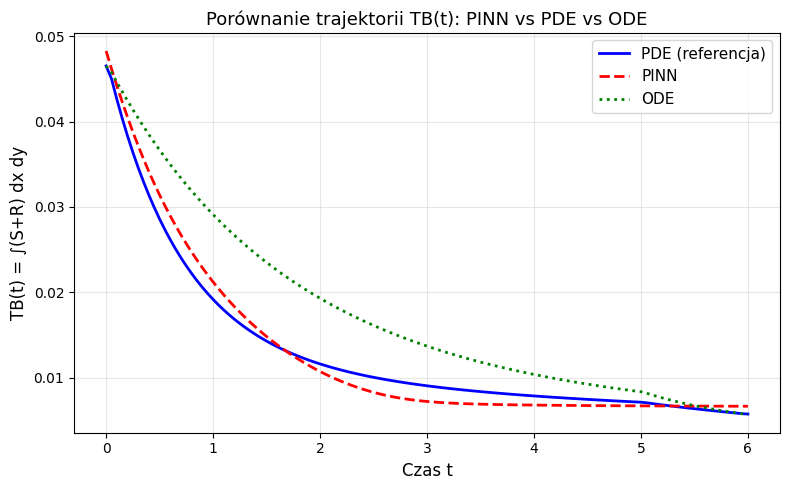


[Metryki]
  RMSE(PINN vs PDE) = 0.001453
  RMSE(ODE  vs PDE) = 0.005676
  RMSE(PINN vs ODE) = 0.005662
  MAE(PINN vs PDE)  = 0.001246
  MAE(ODE  vs PDE)  = 0.004616
  MAE(PINN vs ODE)  = 0.004828
[Zapisano] out/pinn_tb_curves.csv, out/pinn_metrics.json, figs/pinn_tb_compare.png


In [11]:
# Ewaluacja
pinn.eval()

def pinn_TB_at_time(t_scalar: float) -> float:
    """Zwraca TB(t) z PINN dla pojedynczego czasu t_scalar"""
    t_one = torch.tensor([[t_scalar]], dtype=torch.float32, device=device)
    with torch.no_grad():
        tb = pinn_TB_batch(t_one)  # [1,1]
    return float(tb.item())

# PINN → TB(t)
print("[Ewaluacja] Obliczam TB(t) z PINN...")
TB_pinn = np.array([pinn_TB_at_time(ti) for ti in t_eval])

# ODE → TB(t) (te same parametry co PDE po asymilacji)
print("[Ewaluacja] Obliczam TB(t) z ODE...")
TB0 = TB_pde[0]
y0_ode = np.array([0.9*TB0, 0.1*TB0, 0.02, 0.0])
p_ode = ODEParams(
    alpha_S=float(alpha_S_assim),
    mu_max=float(mu_max_assim),
    lam=float(lam_assim),
    **{k:v for k,v in vars(p_assim).items() if k in ['rho_S','rho_R','K','alpha_R','sigma','delta','gamma_S','gamma_R','beta','C50','m_hill','dose_type','dose_A','dose_period']}
)
sim_ode = simulate_ode(p_ode, y0_ode, t_eval)
TB_ode = sim_ode["TB"]

# RMSE + zapis
def rmse(a,b):
    return float(np.sqrt(np.mean((np.asarray(a)-np.asarray(b))**2)))

metrics = {
    "rmse_pinn_vs_pde": rmse(TB_pinn, TB_pde),
    "rmse_ode_vs_pde":  rmse(TB_ode,  TB_pde),
    "rmse_pinn_vs_ode": rmse(TB_pinn, TB_ode),
    "mae_pinn_vs_pde": float(np.mean(np.abs(TB_pinn - TB_pde))),
    "mae_ode_vs_pde": float(np.mean(np.abs(TB_ode - TB_pde))),
    "mae_pinn_vs_ode": float(np.mean(np.abs(TB_pinn - TB_ode)))
}
save_json(metrics, "out/pinn_metrics.json")

# CSV z krzywymi
pd.DataFrame({"t": t_eval, "TB_pde": TB_pde, "TB_pinn": TB_pinn, "TB_ode": TB_ode}).to_csv(
    "out/pinn_tb_curves.csv", index=False
)

# Wykres porównawczy TB(t)
plt.figure(figsize=(8,5))
plt.plot(t_eval, TB_pde, 'b-', linewidth=2, label="PDE (referencja)")
plt.plot(t_eval, TB_pinn, 'r--', linewidth=2, label="PINN")
plt.plot(t_eval, TB_ode, 'g:', linewidth=2, label="ODE")
plt.xlabel("Czas t", fontsize=12)
plt.ylabel("TB(t) = ∫(S+R) dx dy", fontsize=12)
plt.title("Porównanie trajektorii TB(t): PINN vs PDE vs ODE", fontsize=13)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
savefig_fig("figs/pinn_tb_compare.png")
plt.show()

print("\n[Metryki]")
print(f"  RMSE(PINN vs PDE) = {metrics['rmse_pinn_vs_pde']:.6f}")
print(f"  RMSE(ODE  vs PDE) = {metrics['rmse_ode_vs_pde']:.6f}")
print(f"  RMSE(PINN vs ODE) = {metrics['rmse_pinn_vs_ode']:.6f}")
print(f"  MAE(PINN vs PDE)  = {metrics['mae_pinn_vs_pde']:.6f}")
print(f"  MAE(ODE  vs PDE)  = {metrics['mae_ode_vs_pde']:.6f}")
print(f"  MAE(PINN vs ODE)  = {metrics['mae_pinn_vs_ode']:.6f}")
print("[Zapisano] out/pinn_tb_curves.csv, out/pinn_metrics.json, figs/pinn_tb_compare.png")

[Ewaluacja] Obliczam pola przestrzenne w t=T_end...


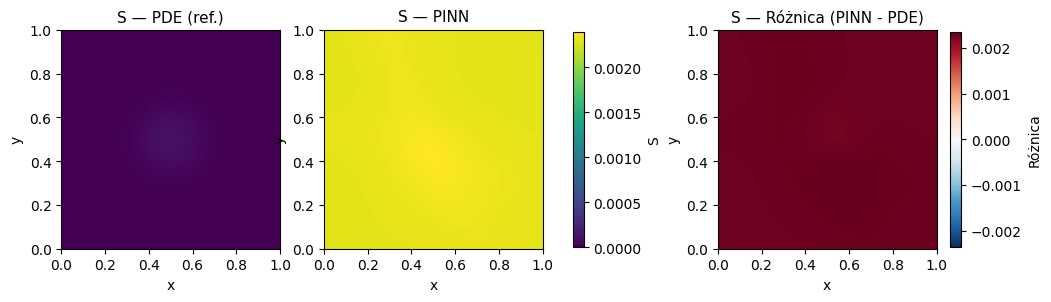

[Zapisano wykres] figs/pinn_vs_pde_field_S.png
  S: RMSE=2.3124e-03, MAE=2.3123e-03, MAX_ERR=2.3603e-03


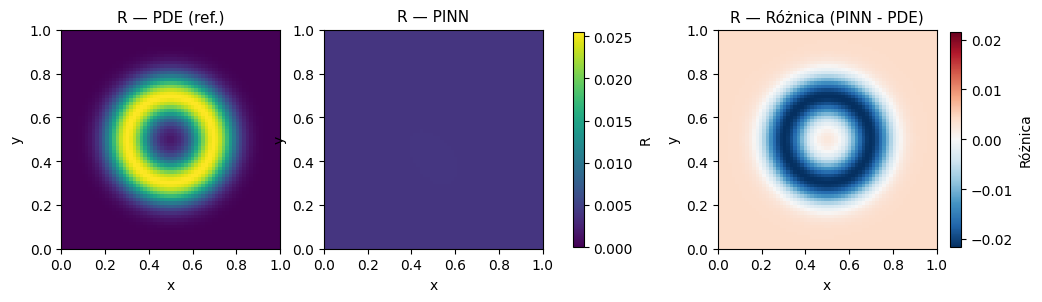

[Zapisano wykres] figs/pinn_vs_pde_field_R.png
  R: RMSE=8.4862e-03, MAE=6.2499e-03, MAX_ERR=2.1628e-02


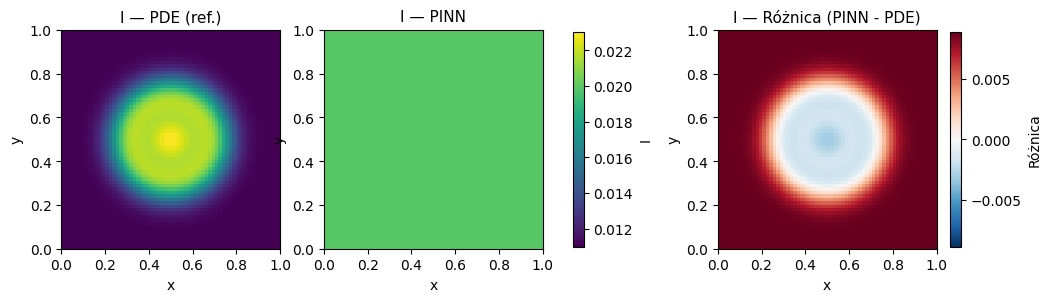

[Zapisano wykres] figs/pinn_vs_pde_field_I.png
  I: RMSE=7.4674e-03, MAE=6.8400e-03, MAX_ERR=8.9368e-03


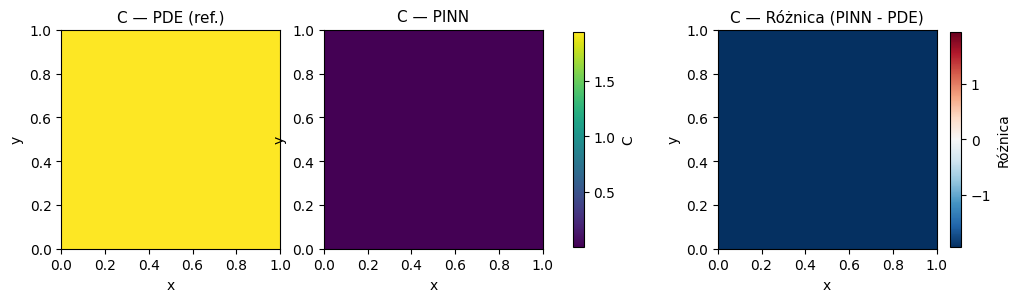

[Zapisano wykres] figs/pinn_vs_pde_field_C.png
  C: RMSE=1.9401e+00, MAE=1.9401e+00, MAX_ERR=1.9401e+00
[Zapisano] out/pinn_final_fields.npz


In [14]:
# Porównanie pól przestrzennych w chwili końcowej
print("[Ewaluacja] Obliczam pola przestrzenne w t=T_end...")

x_grid = np.linspace(0.0, Lx, Nx_data)
y_grid = np.linspace(0.0, Ly, Ny_data)
XG, YG = np.meshgrid(x_grid, y_grid, indexing="ij")

XG_t = torch.tensor(XG.reshape(-1, 1), dtype=torch.float32, device=device)
YG_t = torch.tensor(YG.reshape(-1, 1), dtype=torch.float32, device=device)
tcol = torch.full((XG_t.shape[0], 1), T_end, dtype=torch.float32, device=device)

# Ewaluacja PINN
pinn.eval()
with torch.no_grad():
    S_pinn, R_pinn, I_pinn, C_pinn = pinn(tcol, XG_t, YG_t)
    Sg = S_pinn.reshape(Nx_data, Ny_data).cpu().numpy()
    Rg = R_pinn.reshape(Nx_data, Ny_data).cpu().numpy()
    Ig = I_pinn.reshape(Nx_data, Ny_data).cpu().numpy()
    Cg = C_pinn.reshape(Nx_data, Ny_data).cpu().numpy()

# Funkcja pomocnicza do porównań i zapisu
def save_compare_field(Z_pde, Z_pinn, name):
    vmax = max(Z_pde.max(), Z_pinn.max())
    vmin = min(Z_pde.min(), Z_pinn.min())

    fig, axs = plt.subplots(1, 3, figsize=(12, 3.5))

    # PDE
    im0 = axs[0].imshow(Z_pde.T, origin="lower", extent=(0, Lx, 0, Ly),
                        vmin=vmin, vmax=vmax, cmap="viridis")
    axs[0].set_title(f"{name} — PDE (ref.)", fontsize=11)
    axs[0].set_xlabel("x"); axs[0].set_ylabel("y")

    # PINN
    im1 = axs[1].imshow(Z_pinn.T, origin="lower", extent=(0, Lx, 0, Ly),
                        vmin=vmin, vmax=vmax, cmap="viridis")
    axs[1].set_title(f"{name} — PINN", fontsize=11)
    axs[1].set_xlabel("x"); axs[1].set_ylabel("y")

    # Różnica
    diff = Z_pinn - Z_pde
    vmax_diff = max(abs(diff.min()), abs(diff.max()))
    im2 = axs[2].imshow(diff.T, origin="lower", extent=(0, Lx, 0, Ly),
                        vmin=-vmax_diff, vmax=vmax_diff, cmap="RdBu_r")
    axs[2].set_title(f"{name} — Różnica (PINN - PDE)", fontsize=11)
    axs[2].set_xlabel("x"); axs[2].set_ylabel("y")

    # Colorbars
    fig.colorbar(im1, ax=axs[:2].ravel().tolist(), shrink=0.8, label=name)
    fig.colorbar(im2, ax=axs[2], shrink=0.8, label="Różnica")

    fname = f"figs/pinn_vs_pde_field_{name}.png"
    plt.savefig(fname, dpi=160, bbox_inches="tight")
    plt.show()
    print(f"[Zapisano wykres] {fname}")

    # Statystyki błędu
    rmse_field = np.sqrt(np.mean((Z_pinn - Z_pde)**2))
    mae_field = np.mean(np.abs(Z_pinn - Z_pde))
    max_err = np.max(np.abs(Z_pinn - Z_pde))
    print(f"  {name}: RMSE={rmse_field:.4e}, MAE={mae_field:.4e}, MAX_ERR={max_err:.4e}")

# Porównania
save_compare_field(S_end, Sg, "S")
save_compare_field(R_end, Rg, "R")
save_compare_field(I_end, Ig, "I")
save_compare_field(C_end, Cg, "C")

# Zapisz pola PINN
np.savez("out/pinn_final_fields.npz", S=Sg, R=Rg, I=Ig, C=Cg)
print("[Zapisano] out/pinn_final_fields.npz")

In [15]:
# Podsumowanie końcowe
print("\n" + "="*60)
print("PODSUMOWANIE ZADANIA 6 — PINN")
print("="*60)
print(f"\nParametry po asymilacji (źródło: {src}):")
print(f"  alpha_S = {alpha_S_assim:.4f}")
print(f"  mu_max  = {mu_max_assim:.4f}")
print(f"  lam     = {lam_assim:.4f}")

print(f"\nArchitektura PINN:")
print(f"  Szerokość: 128, Głębokość: 6")
print(f"  Parametry: {sum(p.numel() for p in pinn.parameters())/1e6:.3f}M")
print(f"  Device: {device}")

print(f"\nTrening:")
print(f"  Epoki: {epochs}")
print(f"  Czas: {history[-1]['time']:.1f}s")
print(f"  Końcowa strata: {history[-1]['L']:.3e}")

print(f"\nMetryki TB(t):")
print(f"  RMSE(PINN, PDE) = {metrics['rmse_pinn_vs_pde']:.6f}")
print(f"  RMSE(ODE,  PDE) = {metrics['rmse_ode_vs_pde']:.6f}")
print(f"  MAE(PINN,  PDE) = {metrics['mae_pinn_vs_pde']:.6f}")
print(f"  MAE(ODE,   PDE) = {metrics['mae_ode_vs_pde']:.6f}")

print(f"\nPliki wyjściowe:")
print(f"  - out/pinn_model.pt (wagi sieci)")
print(f"  - out/pinn_training_history.csv (historia treningu)")
print(f"  - out/pinn_tb_curves.csv (trajektorie TB)")
print(f"  - out/pinn_metrics.json (metryki)")
print(f"  - out/pinn_final_fields.npz (pola końcowe)")
print(f"  - figs/pinn_tb_compare.png (porównanie TB)")
print(f"  - figs/pinn_vs_pde_field_*.png (porównania pól)")
print(f"  - figs/pinn_training_loss.png (krzywe uczenia)")

print("\n" + "="*60)
print("Zadanie 6 zakończone pomyślnie!")
print("="*60)


PODSUMOWANIE ZADANIA 6 — PINN

Parametry po asymilacji (źródło: out/3dvar_large_summary.json):
  alpha_S = 1.2000
  mu_max  = 0.0051
  lam     = 0.0650

Architektura PINN:
  Szerokość: 128, Głębokość: 6
  Parametry: 0.084M
  Device: cuda

Trening:
  Epoki: 3000
  Czas: 989.8s
  Końcowa strata: 1.463e-03

Metryki TB(t):
  RMSE(PINN, PDE) = 0.001453
  RMSE(ODE,  PDE) = 0.005676
  MAE(PINN,  PDE) = 0.001246
  MAE(ODE,   PDE) = 0.004616

Pliki wyjściowe:
  - out/pinn_model.pt (wagi sieci)
  - out/pinn_training_history.csv (historia treningu)
  - out/pinn_tb_curves.csv (trajektorie TB)
  - out/pinn_metrics.json (metryki)
  - out/pinn_final_fields.npz (pola końcowe)
  - figs/pinn_tb_compare.png (porównanie TB)
  - figs/pinn_vs_pde_field_*.png (porównania pól)
  - figs/pinn_training_loss.png (krzywe uczenia)

Zadanie 6 zakończone pomyślnie!
